# Simple Linear Regression using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(np.__version__)

2.0.0


In [2]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    
    def forward_propagation(self,train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self,predictions,train_output):
        cost = np.mean((predictions - train_output) ** 2)
        return cost
    
    def back_propagation(self,train_input,train_output,predictions):
        derivatives = {} 
        differences = predictions - train_output
        derivatives['dm'] = 2 * np.mean(np.multiply(train_input, differences)) 
        derivatives['dc'] = 2 * np.mean(differences)
        return derivatives
    
    def update_parameters(self,derivatives,learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
        
        
    
    def train(self,train_input,train_output,learning_rate=0.0001,epochs=1000):
        self.parameters['m'] = np.random.uniform(0,1)
        self.parameters['c'] = np.random.uniform(0,1)

        self.loss = []

        for epoch in range(epochs):
            
            predictions = self.forward_propagation(train_input)

            cost = self.cost_function(predictions,train_output)
            self.loss.append(cost)
            derivatives = self.back_propagation(train_input,train_output,predictions)
            self.update_parameters(derivatives,learning_rate)
            
            print(f'Epoch: {epoch}, Cost: {cost}')

        return self.parameters

In [3]:
def predictor(test_input):
    y = linear.parameters['m'] * test_input + linear.parameters['c']
    return y

In [19]:
class EvaluationMetrics:

    def mse(self,predictions,labels):
        differences = predictions-labels
        n = len(predictions)
        return 1.0/n * np.dot(differences.T,differences)
    
    def mae(self,predictions,labels):
        differences = predictions-labels
        sum = 0
        n = len(predictions)-1
        for i in range(len(differences)):
            sum += abs(differences[i])
        return 1.0/n * sum
    
    def rmse(self,predictions,labels):
        return np.sqrt(self.mse(predictions,labels))
    
    def r_squared(self,predictions,labels,mean):
        RSS = np.sum((labels - predictions) ** 2)
        TSS = np.sum((labels - mean) ** 2)
        r2 = 1 - (RSS/TSS)
        return r2
    

In [5]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

In [6]:
data.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
data.x.size

700

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [9]:
data = data.dropna()

In [10]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [11]:
linear = LinearRegression()
parameters = linear.train(train_input,train_output,epochs=20)
print(parameters)

Epoch: 0, Cost: 2368.6652788975
Epoch: 1, Cost: 292.3554771654177
Epoch: 2, Cost: 42.1375475246321
Epoch: 3, Cost: 11.983561215659343
Epoch: 4, Cost: 8.349674960431807
Epoch: 5, Cost: 7.911749371299404
Epoch: 6, Cost: 7.858971823274955
Epoch: 7, Cost: 7.852608805917715
Epoch: 8, Cost: 7.851839244896512
Epoch: 9, Cost: 7.851743756512378
Epoch: 10, Cost: 7.851729501493555
Epoch: 11, Cost: 7.8517250362561
Epoch: 12, Cost: 7.851721751070619
Epoch: 13, Cost: 7.851718608371001
Epoch: 14, Cost: 7.851715483119205
Epoch: 15, Cost: 7.851712360246763
Epoch: 16, Cost: 7.85170923793773
Epoch: 17, Cost: 7.851706115973236
Epoch: 18, Cost: 7.851702994326879
Epoch: 19, Cost: 7.85169987299545
{'m': np.float64(0.9956899849526802), 'c': np.float64(0.11461701801384898)}


In [12]:
len(linear.loss)

20

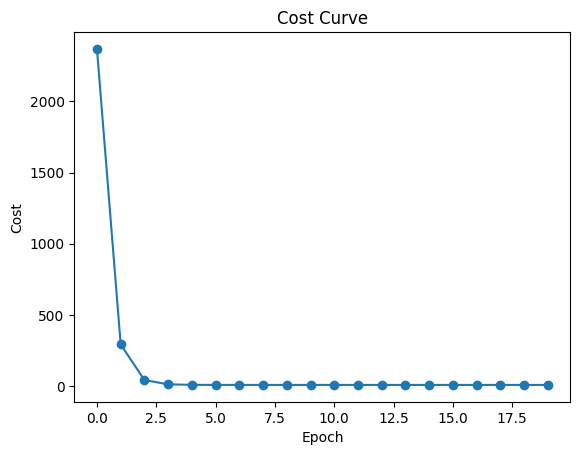

In [13]:
fig, ax = plt.subplots()

ax.scatter([i for i in range(0,len(linear.loss))],linear.loss)
ax.set_xlabel("Epoch")
ax.set_ylabel("Cost")
ax.plot([i for i in range(0,len(linear.loss))],linear.loss)
ax.set_title("Cost Curve")
plt.show()


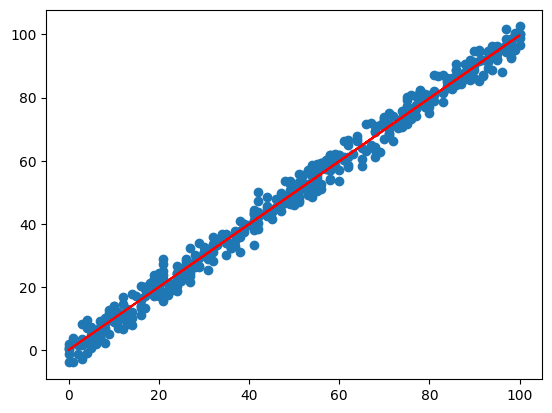

In [14]:
y = parameters['m'] * train_input +parameters['c']
plt.scatter(train_input,train_output)
plt.plot(train_input,y,'r')
plt.show()

In [15]:
predictions = predictor(test_input)

In [20]:
Evaluator = EvaluationMetrics()
print("The MSE of the Model is: ",Evaluator.mse(predictions,test_output)[0][0])
print("The MAE of the Model is: ",Evaluator.mae(predictions,test_output)[0])
print("The RMSE of the Model is: ",Evaluator.rmse(predictions,test_output)[0][0])
print("The R2 of the Model is: ",Evaluator.r_squared(predictions,test_output,np.mean(test_output)))

The MSE of the Model is:  7.98309290366406
The MAE of the Model is:  2.248112023542661
The RMSE of the Model is:  2.8254367633454582
The R2 of the Model is:  0.990907996050178
